#### Analysis of multiple stocks - for simulation over the course of 2 years (bi-weekly buy in)

Goal: This script simulates 2 years of bi-weekly prediction/closing_cost determinations and simulates for a series of chosen stocks if it is better to invest a consistent price or buy in higher/lower depending on the current performance of the stock.

Take any number of stocks and run a trendline through multiple 1 year cycles, creating a linear prediction to be applied bi-weekly. Assess the theoretical performance of adjusting bi-weekly contributions as compared to contributing a consistent amount every other week.


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [2]:
# To do's

# test the dynamic roll_days - is it implemented everywhere it should be and everything works as expected?
# Fix the graphs to be dynamic for dates - esp the 3 graphs stuck together - can I make the number of stuck visuals dynamic?
# make the invest period dynamic - not just 10 days (2 work weeks)

# Fix the final statement to say profit/loss or above/below dynamically
    # seems to have an issue with the reversal of percents when the total profits are negative
# Fact check the dynamic dates - is everything really working?
# Test for different 3 year periods of time
# Fact check by trying different stocks entirely - do a series of poorly performing stocks, high performing stocks, and a mix
# Clean up code

# I really need to fix the invest days to be always on Monday or something instead of every 10 trading days


In [3]:
# choose stocks of interest
# stocks chosen must all have data for full range of dates
# lista = ['AAPL', 'AMD', 'AMZN', 'CRM', 'GOOG', 'INTC', 'MDB', 'MSFT', 'NVDA', 'QQQ', 'SBUX', 'SQ', 'TSLA', 'TSM']
lista = ['AAPL', 'AMD', 'AMZN']

# choose how much to contribute each bi-weekly period
biwkly_contrib = 10 

# max amount to contribute per stock over the course of 2 years
# should be at least 50 times the bi-weekly contrib
invest = biwkly_contrib*50

# number of days to roll into each linear regression. 
# 260 will be about 1 year
# 65 will be about 1 quarter
roll_days = 65

In [4]:
# Pull the closing data

data = yf.download(
        tickers = lista
        ,period = '3y'
        #,start = '2018-01-01' # to choose custom date ranges
        #,end = '2020-01-01' # to choose custom date ranges
    )

df = data['Close']
df = df.dropna() # in case the first row generates as nulls
df['Index'] = np.arange(1,len(df)+1) # add an index
df

[*********************100%***********************]  3 of 3 completed


,AAPL,AMD,AMZN,Index
Date,,,,
2018-12-10,42.400002,19.990000,1641.030029,1
2018-12-11,42.157501,19.980000,1643.239990,2
2018-12-12,42.275002,20.480000,1663.540039,3
2018-12-13,42.737499,19.860001,1658.380005,4
2018-12-14,41.369999,19.900000,1591.910034,5
...,...,...,...,...
2021-12-02,163.759995,150.679993,3437.360107,752
2021-12-03,161.839996,144.009995,3389.790039,753
2021-12-06,165.320007,139.059998,3427.370117,754


In [5]:
### in progress
# setting a rolling 260 days for each observed stock

df2 = df

for j in lista:
    df2[str(j) + ' roll'] = df2[str(j)].rolling(roll_days).mean()

df2
#df2.to_csv(r'/Volumes/GoogleDrive/My Drive/Python/other_projects/roll_test.csv', index = False)

,AAPL,AMD,AMZN,Index,AAPL roll,AMD roll,AMZN roll
Date,,,,,,,
2018-12-10,42.400002,19.990000,1641.030029,1,NaN,NaN,NaN
2018-12-11,42.157501,19.980000,1643.239990,2,NaN,NaN,NaN
2018-12-12,42.275002,20.480000,1663.540039,3,NaN,NaN,NaN
2018-12-13,42.737499,19.860001,1658.380005,4,NaN,NaN,NaN
2018-12-14,41.369999,19.900000,1591.910034,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-12-02,163.759995,150.679993,3437.360107,752,149.833385,122.485384,3426.772938
2021-12-03,161.839996,144.009995,3389.790039,753,149.976923,123.008769,3425.400477
2021-12-06,165.320007,139.059998,3427.370117,754,150.156462,123.468154,3424.850477


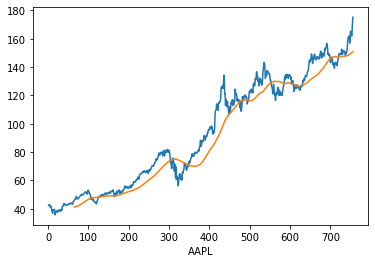

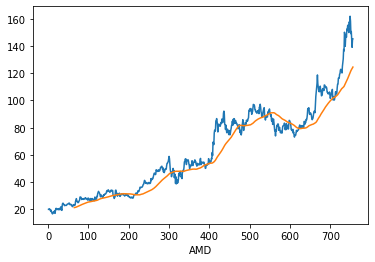

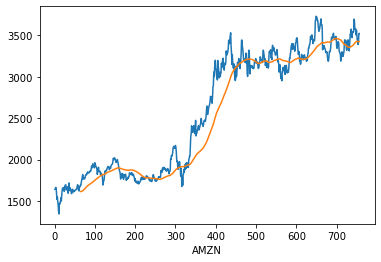

In [6]:
### in progress
# Not what I thought. I thought it would match the rolling linear predictions.
# This is a single point representing 260 days while the linear predition is a line representing 260 days
# I would have to do something weird like set a multiplier based on the gains/losses made in the last year
# but that sounds too iffy and made up

for j in lista:
    x = df2['Index']
    y = df2[str(j)]
    plt.plot(x, y)

    x = df2['Index']
    y = df2[str(j) + ' roll']
    plt.plot(x, y)

    plt.xlabel(j)
    plt.show()

In [7]:
#df3['Dates'] = df3.index
#df3

In [8]:
### in progress
# now that I know I don't want a rolling average, find out how to more simply do a rolling linear regression
# goal is to avoid having to make 50 dataframes

# https://www.statsmodels.org/dev/examples/notebooks/generated/rolling_ls.html
# https://www.statsmodels.org/dev/generated/statsmodels.regression.rolling.RollingOLS.html

# issue - I need every iteration to have a fresh 1-260 as opposed to 1-260, then 2-261, etc
    # I can't seem to read from a stagnant list to do this

#mod = RollingOLS.from_formula("TSM ~ Index", data=df3, window=roll_days)
#rres = mod.fit()
#df3 = rres.params
#df3['TSM'] = df['TSM']
#df3['Pred'] = df3['Intercept']+(df3['Index']*roll_days)
#df3

#df3.to_csv(r'/Volumes/GoogleDrive/My Drive/Python/other_projects/roll_test.csv', index = False)

In [9]:
# function to make a useful time structure as independent variable
def myTime(date_time_str):
    date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')
    return(time.mktime(date_time_obj.timetuple()))

In [10]:
#df3['Time'] = [myTime(obs) for obs in df3['Dates']]

In [11]:
# create 50 dataframes in a dictionary, each 260 days: dataframes['data0'] - dataframes['data49']
# 0 is the most recent 260 days, 49 is the oldest
# 260 days isn't exactly 1 trading year, but I think it's close enough

dataframes = {}

for j in lista:
    x = (max(df['Index']))-roll_days
    y = max(df['Index'])

    for i in range(50):
        dataframes['data' + str(i)] = df.iloc[x:y]
        x -= 10 # 10 denotes 2 work weeks
        y -= 10 # 10 denotes 2 work weeks

print(dataframes['data0'])
print(dataframes['data49'])

                  AAPL         AMD         AMZN  Index   AAPL roll  \
Date                                                                 
2021-09-08  155.110001  106.169998  3525.500000    692  143.300308   
2021-09-09  154.070007  106.150002  3484.159912    693  143.720769   
2021-09-10  148.970001  105.199997  3469.149902    694  144.056769   
2021-09-13  149.550003  104.800003  3457.169922    695  144.417385   
2021-09-14  148.119995  105.730003  3450.000000    696  144.736923   
...                ...         ...          ...    ...         ...   
2021-12-02  163.759995  150.679993  3437.360107    752  149.833385   
2021-12-03  161.839996  144.009995  3389.790039    753  149.976923   
2021-12-06  165.320007  139.059998  3427.370117    754  150.156462   
2021-12-07  171.179993  144.850006  3523.290039    755  150.416154   
2021-12-08  175.080002  145.240005  3523.159912    756  150.699077   

              AMD roll    AMZN roll  
Date                                 
2021-09-08   

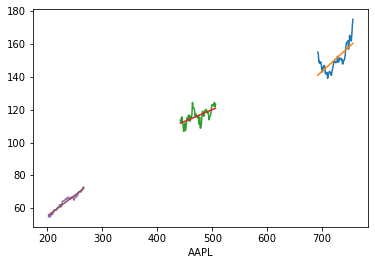

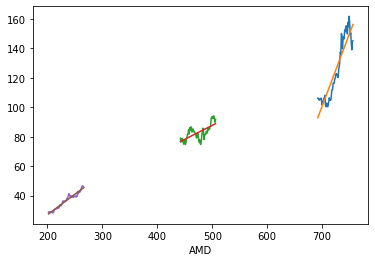

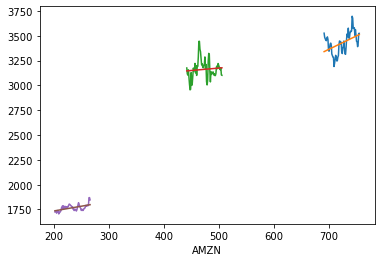

In [12]:
# plot 3 1-year segments of data with their associated trendlines

for i in lista:
    # plot data with a trendline - most recent 260 days
    x = dataframes['data0']['Index']
    y = dataframes['data0'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the middle 260 days
    x = dataframes['data25']['Index']
    y = dataframes['data25'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    # plot data with a trendline - the oldest 260 days
    x = dataframes['data49']['Index']
    y = dataframes['data49'][str(i)]
    plt.plot(x, y)
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

    plt.xlabel(i)
    plt.show()

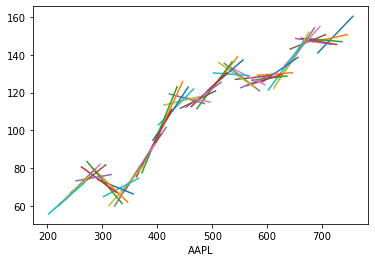

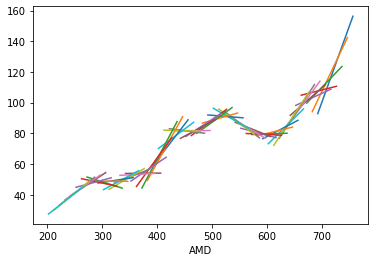

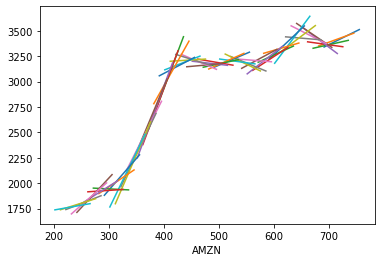

In [13]:
# plot only trendlines, bi-weekly, each line representing 1 year of data
# if the movement is too stable, these graphs won't be useable

for j in lista:
    for i in range(len(dataframes)):
        x = dataframes['data' + str(i)]['Index']
        y = dataframes['data' + str(i)][str(j)]

        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x + b)

    plt.xlabel(j)
    plt.show()

In [14]:
# create pred and pred/close list for each of the 50 dataframes
# may take 30+ seconds to run

k = len(dataframes)

for j in lista:
    for e in range(k):
        nlist = []
        ylist = []
        y = dataframes['data' + str(e)][str(j)]

        for i in range(1,len(dataframes['data0'])+1): # create pred
            x = range(roll_days)
            m, b = np.polyfit(x, y, 1)
            d = m*i+b
            nlist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred'] = nlist

        for i in range(1,len(dataframes['data0'])+1): # create pred/close
            d = (dataframes['data' + str(e)][str(j) + ' pred'].iloc[i-1])/(dataframes['data' + str(e)][str(j)].iloc[i-1])
            ylist.append(d)

        dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist

dataframes['data0']

<ipython-input-14-6f7aa18876ec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes['data' + str(e)][str(j) + ' pred'] = nlist
<ipython-input-14-6f7aa18876ec>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes['data' + str(e)][str(j) + ' pred/close'] = ylist


,AAPL,AMD,AMZN,Index,AAPL roll,AMD roll,AMZN roll,AAPL pred,AAPL pred/close,AMD pred,AMD pred/close,AMZN pred,AMZN pred/close
Date,,,,,,,,,,,,,
2021-09-08,155.110001,106.169998,3525.500000,692,143.300308,96.895077,3451.097840,141.294776,0.910933,93.834580,0.883814,3342.555991,0.948108
2021-09-09,154.070007,106.150002,3484.159912,693,143.720769,97.283692,3454.483222,141.598141,0.919051,94.825747,0.893318,3345.239987,0.960128
2021-09-10,148.970001,105.199997,3469.149902,694,144.056769,97.672000,3457.375530,141.901505,0.952551,95.816915,0.910807,3347.923982,0.965056
2021-09-13,149.550003,104.800003,3457.169922,695,144.417385,98.029538,3459.029684,142.204870,0.950885,96.808082,0.923741,3350.607978,0.969177
2021-09-14,148.119995,105.730003,3450.000000,696,144.736923,98.405231,3460.616913,142.508234,0.962113,97.799250,0.924991,3353.291974,0.971969
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-02,163.759995,150.679993,3437.360107,752,149.833385,122.485384,3426.772938,159.496649,0.973966,153.304624,1.017419,3503.595737,1.019269
2021-12-03,161.839996,144.009995,3389.790039,753,149.976923,123.008769,3425.400477,159.800014,0.987395,154.295791,1.071424,3506.279732,1.034365
2021-12-06,165.320007,139.059998,3427.370117,754,150.156462,123.468154,3424.850477,160.103378,0.968445,155.286958,1.116690,3508.963728,1.023806


In [15]:
# pull the last 'close' and pred/close' from each dataframe in dataframes and make a new dataframe out of it
# each row is the last close price in a 1-year period and the final pred/close derived from a 1-year trendline
# the rows have a 50 week overlap and are separated by 2 weeks

df = pd.DataFrame()
add_index = np.arange(1,len(dataframes)+1)
df['Index'] = add_index

for j in lista:
    nlist = []
    ylist = []
    zlist = []
    k = len(dataframes['data0'])

    for e in reversed(range(len(dataframes))):
        nlist.append(round(dataframes['data' + str(e)][str(j) + ' pred/close'].iloc[k-1],4))
        ylist.append(round(dataframes['data' + str(e)][str(j)].iloc[k-1],4))
        zlist.append(round(dataframes['data' + str(e)][str(j) + ' pred'].iloc[k-1],2))

    df[str(j)] = pd.DataFrame(ylist)
    df[str(j) + ' pred'] = pd.DataFrame(zlist)
    df[str(j) + ' pred/close'] = pd.DataFrame(nlist)

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close
40,41,145.52,147.32,1.0124,108.63,96.22,0.8858,3331.4800,3650.01,1.0956
41,42,151.12,152.40,1.0085,107.48,107.44,0.9996,3298.9900,3554.90,1.0776
42,43,153.12,154.66,1.0100,111.32,112.31,1.0089,3421.5701,3410.63,0.9968
43,44,148.12,155.31,1.0485,105.73,114.45,1.0825,3450.0000,3370.22,0.9769
44,45,141.91,150.77,1.0624,101.52,111.96,1.1028,3315.9600,3333.27,1.0052
45,46,141.51,145.47,1.0280,105.04,108.95,1.0372,3247.3301,3271.87,1.0076
46,47,149.32,145.40,0.9738,122.93,110.74,0.9008,3376.0701,3342.01,0.9899
47,48,150.81,146.93,0.9743,148.92,123.90,0.8320,3576.2300,3406.84,0.9526
48,49,161.41,150.75,0.9340,149.92,143.11,0.9546,3580.0400,3477.92,0.9715
49,50,175.08,160.71,0.9179,145.24,157.27,1.0828,3523.1599,3514.33,0.9975


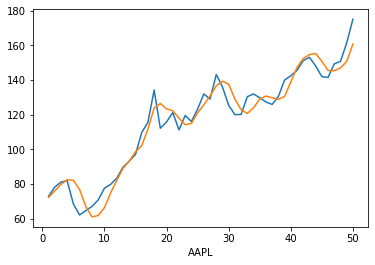

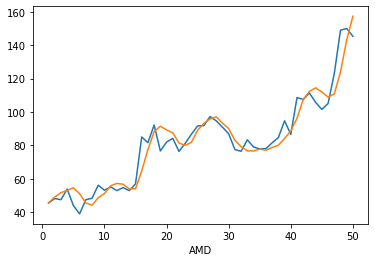

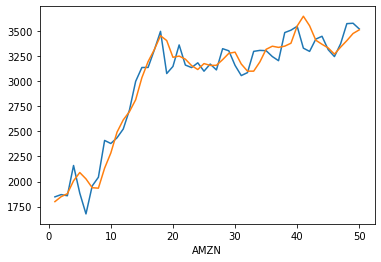

In [16]:
# plot for each stock the close price and the prediction price
# close (blue) below prediction (orange) = stock is underperforming

for i in lista:
    x = df['Index']
    y = df[str(i)]
    plt.plot(x, y)

    x = df['Index']
    y = df[str(i) + ' pred']
    plt.plot(x, y)

    plt.xlabel(i)
    plt.show()

#### At this point, the foundation is set and strategies can be created and tested.

In [17]:
# determine the weeks where pred/close is >1 and therefore they are better weeks to buy in
# steady stocks could be at about 50/50 but stocks exponentially rising could have close to 0 pred/close > 1

for j in lista:
    nlist = []
    for i in range(len(df)):
        if df[str(j) + ' pred/close'].iloc[i] >= 1:
            nlist.append(1)
        else:
            nlist.append(0)

    df[str(j) + ' >1'] = nlist

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,AAPL >1,AMD >1,AMZN >1
40,41,145.52,147.32,1.0124,108.63,96.22,0.8858,3331.4800,3650.01,1.0956,1,0,1
41,42,151.12,152.40,1.0085,107.48,107.44,0.9996,3298.9900,3554.90,1.0776,1,0,1
42,43,153.12,154.66,1.0100,111.32,112.31,1.0089,3421.5701,3410.63,0.9968,1,1,0
43,44,148.12,155.31,1.0485,105.73,114.45,1.0825,3450.0000,3370.22,0.9769,1,1,0
44,45,141.91,150.77,1.0624,101.52,111.96,1.1028,3315.9600,3333.27,1.0052,1,1,1
45,46,141.51,145.47,1.0280,105.04,108.95,1.0372,3247.3301,3271.87,1.0076,1,1,1
46,47,149.32,145.40,0.9738,122.93,110.74,0.9008,3376.0701,3342.01,0.9899,0,0,0
47,48,150.81,146.93,0.9743,148.92,123.90,0.8320,3576.2300,3406.84,0.9526,0,0,0
48,49,161.41,150.75,0.9340,149.92,143.11,0.9546,3580.0400,3477.92,0.9715,0,0,0
49,50,175.08,160.71,0.9179,145.24,157.27,1.0828,3523.1599,3514.33,0.9975,0,1,0


In [18]:
# square the pred/close number as a more extreme option for calculations

for j in lista:
    df[str(j) +' pred/close2'] = round(df[str(j) +' pred/close']**2,4) # make the value differences a little more pronounced

df.tail(10)

,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,AAPL >1,AMD >1,AMZN >1,AAPL pred/close2,AMD pred/close2,AMZN pred/close2
40,41,145.52,147.32,1.0124,108.63,96.22,0.8858,3331.4800,3650.01,1.0956,1,0,1,1.0250,0.7846,1.2003
41,42,151.12,152.40,1.0085,107.48,107.44,0.9996,3298.9900,3554.90,1.0776,1,0,1,1.0171,0.9992,1.1612
42,43,153.12,154.66,1.0100,111.32,112.31,1.0089,3421.5701,3410.63,0.9968,1,1,0,1.0201,1.0179,0.9936
43,44,148.12,155.31,1.0485,105.73,114.45,1.0825,3450.0000,3370.22,0.9769,1,1,0,1.0994,1.1718,0.9543
44,45,141.91,150.77,1.0624,101.52,111.96,1.1028,3315.9600,3333.27,1.0052,1,1,1,1.1287,1.2162,1.0104
45,46,141.51,145.47,1.0280,105.04,108.95,1.0372,3247.3301,3271.87,1.0076,1,1,1,1.0568,1.0758,1.0153
46,47,149.32,145.40,0.9738,122.93,110.74,0.9008,3376.0701,3342.01,0.9899,0,0,0,0.9483,0.8114,0.9799
47,48,150.81,146.93,0.9743,148.92,123.90,0.8320,3576.2300,3406.84,0.9526,0,0,0,0.9493,0.6922,0.9074
48,49,161.41,150.75,0.9340,149.92,143.11,0.9546,3580.0400,3477.92,0.9715,0,0,0,0.8724,0.9113,0.9438
49,50,175.08,160.71,0.9179,145.24,157.27,1.0828,3523.1599,3514.33,0.9975,0,1,0,0.8425,1.1725,0.9950


In [19]:
# Create all of the strategies to test 

for j in lista:
    
# baseline - buy in $10 bi-weekly no matter what - baseline
    df[str(j) +' baseline'] = 0
    df[str(j) +' baseline_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' baseline'].iloc[i] = biwkly_contrib
        df[str(j) +' baseline_stk'].iloc[i] = round(df[str(j) +' baseline'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib
        if v < biwkly_contrib:
            break

# opt1 - buy in every other week but proportionally to the pred/close
    df[str(j) +' opt1'] = 0
    df[str(j) +' opt1_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt1'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        df[str(j) +' opt1_stk'].iloc[i] = round(df[str(j) +' opt1'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close'].iloc[t]:
            break

# opt2 - buy in every other week but proportionally to the square of pred/close
    df[str(j) +' opt2'] = 0
    df[str(j) +' opt2_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt2'].iloc[i] = biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        df[str(j) +' opt2_stk'].iloc[i] = round(df[str(j) +' opt2'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*df[str(j) +' pred/close2'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*df[str(j) +' pred/close2'].iloc[t]:
            break

# opt3 - buy in every other week. 0 on days <1 and twice the normal bi-weekly contribution on days >= 1
    df[str(j) +' opt3'] = 0
    df[str(j) +' opt3_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt3'].iloc[i] = biwkly_contrib*2*df[str(j) +' >1'].iloc[i] 
        df[str(j) +' opt3_stk'].iloc[i] = round(df[str(j) +' opt3'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib*2*df[str(j) +' >1'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib*2*df[str(j) +' >1'].iloc[t]:
            break

# opt4 - buy in every other week but proportionally to the inverse of pred/close
# This is more of a validation and will ideally return negative compared to baseline
    df[str(j) +' opt4'] = 0
    df[str(j) +' opt4_stk'] = 0
    v = invest
    for i in range(len(df)):
        df[str(j) +' opt4'].iloc[i] = round(biwkly_contrib/df[str(j) +' pred/close'].iloc[i],4)
        df[str(j) +' opt4_stk'].iloc[i] = round(df[str(j) +' opt4'].iloc[i]/df[str(j)].iloc[i],4)
        v -= biwkly_contrib/df[str(j) +' pred/close'].iloc[i]
        if i == (len(df)-1):
            t = i
        else:
            t = i+1
        if v < biwkly_contrib/df[str(j) +' pred/close'].iloc[t]:
            break

df.tail(10)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Index,AAPL,AAPL pred,AAPL pred/close,AMD,AMD pred,AMD pred/close,AMZN,AMZN pred,AMZN pred/close,...,AMZN baseline,AMZN baseline_stk,AMZN opt1,AMZN opt1_stk,AMZN opt2,AMZN opt2_stk,AMZN opt3,AMZN opt3_stk,AMZN opt4,AMZN opt4_stk
40,41,145.52,147.32,1.0124,108.63,96.22,0.8858,3331.4800,3650.01,1.0956,...,10,0.0030,10.956,0.0033,12.003,0.0036,20,0.0060,9.1274,0.0027
41,42,151.12,152.40,1.0085,107.48,107.44,0.9996,3298.9900,3554.90,1.0776,...,10,0.0030,10.776,0.0033,11.612,0.0035,20,0.0061,9.2799,0.0028
42,43,153.12,154.66,1.0100,111.32,112.31,1.0089,3421.5701,3410.63,0.9968,...,10,0.0029,9.968,0.0029,9.936,0.0029,0,0.0000,10.0321,0.0029
43,44,148.12,155.31,1.0485,105.73,114.45,1.0825,3450.0000,3370.22,0.9769,...,10,0.0029,9.769,0.0028,9.543,0.0028,0,0.0000,10.2365,0.0030
44,45,141.91,150.77,1.0624,101.52,111.96,1.1028,3315.9600,3333.27,1.0052,...,10,0.0030,10.052,0.0030,10.104,0.0030,20,0.0060,9.9483,0.0030
45,46,141.51,145.47,1.0280,105.04,108.95,1.0372,3247.3301,3271.87,1.0076,...,10,0.0031,10.076,0.0031,10.153,0.0031,20,0.0062,9.9246,0.0031
46,47,149.32,145.40,0.9738,122.93,110.74,0.9008,3376.0701,3342.01,0.9899,...,10,0.0030,9.899,0.0029,9.799,0.0029,0,0.0000,10.1020,0.0030
47,48,150.81,146.93,0.9743,148.92,123.90,0.8320,3576.2300,3406.84,0.9526,...,10,0.0028,9.526,0.0027,9.074,0.0025,0,0.0000,10.4976,0.0029
48,49,161.41,150.75,0.9340,149.92,143.11,0.9546,3580.0400,3477.92,0.9715,...,10,0.0028,9.715,0.0027,9.438,0.0026,0,0.0000,10.2934,0.0029
49,50,175.08,160.71,0.9179,145.24,157.27,1.0828,3523.1599,3514.33,0.9975,...,10,0.0028,0.000,0.0000,0.000,0.0000,0,0.0000,10.0251,0.0028


In [20]:
print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')

df_bought_in = pd.DataFrame()
df_profit = pd.DataFrame()
df_diff = pd.DataFrame()

for j in lista:
    d = {'name': [str(j) +' baseline', str(j) +' op1', str(j) +' op2', str(j) +' op3', str(j) +' op4']
         ,'bought_in': [
             round(sum(df[str(j) +' baseline']),2),
             round(sum(df[str(j) +' opt1']),2), 
             round(sum(df[str(j) +' opt2']),2), 
             round(sum(df[str(j) +' opt3']),2),
             round(sum(df[str(j) +' opt4']),2)]
         ,'stocks_held': [
             round(sum(df[str(j) +' baseline_stk']),4), 
             round(sum(df[str(j) +' opt1_stk']),4), 
             round(sum(df[str(j) +' opt2_stk']),4), 
             round(sum(df[str(j) +' opt3_stk']),4), 
             round(sum(df[str(j) +' opt4_stk']),4)]
#          ,'cost_per_stock': [
#              sum(df[str(j) +' baseline'])/sum(df[str(j) +' baseline_stk']), 
#              sum(df[str(j) +' opt1'])/sum(df[str(j) +' opt1_stk']), 
#              sum(df[str(j) +' opt2'])/sum(df[str(j) +' opt2_stk']), 
#              sum(df[str(j) +' opt3'])/sum(df[str(j) +' opt3_stk']), 
#             sum(df[str(j) +' opt4'])/sum(df[str(j) +' opt4_stk'])]
         ,'profit': [
             round((sum(df[str(j) +' baseline_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' baseline']),2),
             round((sum(df[str(j) +' opt1_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt1']),2), 
             round((sum(df[str(j) +' opt2_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt2']),2), 
             round((sum(df[str(j) +' opt3_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt3']),2), 
             round((sum(df[str(j) +' opt4_stk']) * df[str(j)].iloc[49]) - sum(df[str(j) +' opt4']),2)]
        }

    df2 = pd.DataFrame(data=d)

    df2['diff'] = 0
    df2['diff'].iloc[1] = round(df2['profit'].iloc[1]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[2] = round(df2['profit'].iloc[2]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[3] = round(df2['profit'].iloc[3]-df2['profit'].iloc[0],2)
    df2['diff'].iloc[4] = round(df2['profit'].iloc[4]-df2['profit'].iloc[0],2)

    df2['%_diff'] = round((df2['diff']/df2['profit'])*100,2)

    print('')
    print(df2)
    
    df_bought_in[str(j) + ' bought_in'] = df2['bought_in']
    df_profit[str(j) + ' profit'] = df2['profit']
    df_diff[str(j) + ' diff'] = df2['diff']

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

            name  bought_in  stocks_held  profit   diff  %_diff
0  AAPL baseline     500.00       4.6210  309.04   0.00    0.00
1       AAPL op1     499.27       4.6290  311.17   2.13    0.68
2       AAPL op2     492.55       4.6181  315.99   6.95    2.20
3       AAPL op3     460.00       4.2141  277.80 -31.24  -11.25
4       AAPL op4     492.15       4.5786  309.47   0.43    0.14

           name  bought_in  stocks_held  profit   diff  %_diff
0  AMD baseline     500.00       6.8192  490.42   0.00    0.00
1       AMD op1     491.05       6.8445  503.05  12.63    2.51
2       AMD op2     496.34       7.0095  521.72  31.30 

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [21]:
# how much was ivested
# no amount should be above the previously set 'invest' amount
# row 0 = baselines. Rows 1-4 = options 1-4
df_bought_in

,AAPL bought_in,AMD bought_in,AMZN bought_in
0,500.00,500.00,500.00
1,499.27,491.05,491.38
2,492.55,496.34,494.10
3,460.00,500.00,480.00
4,492.15,493.08,499.91


In [22]:
# profits made above/below the investment
# row 0 = baselines. Rows 1-4 = options 1-4
df_profit

,AAPL profit,AMD profit,AMZN profit
0,309.04,490.42,116.20
1,311.17,503.05,118.13
2,315.99,521.72,120.34
3,277.80,553.45,111.19
4,309.47,483.14,115.58


In [23]:
# profits made above/below the baseline profits
# row 0 = baselines. Rows 1-4 = options 1-4
df_diff

,AAPL diff,AMD diff,AMZN diff
0,0.00,0.00,0.00
1,2.13,12.63,1.93
2,6.95,31.30,4.14
3,-31.24,63.03,-5.01
4,0.43,-7.28,-0.62


In [24]:
# Final summary calculations
# if you take chosen stocks and apply chosen investment strategies over the course of 2 years, 
# investing bi-weekly, you get these results:

print('Current date/time: ', datetime.datetime.now().strftime("%B %d, %Y %H:%M:%S"))
print('')

print('baseline - contribute 10 every other week')
print('opt1 - buy in every other week proportional to the pred/close variable')
print('opt2 - buy in every other week proportional to the square of pred/close variable')
print('opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1')
print('opt4 - buy in every other week inversely proportional to the pred/close variable')
print('')

print(round(sum(df_diff.iloc[1]),2), 'opt1 profit/loss over baseline.', 
      round(sum(df_profit.iloc[1]),2), 'core profit on', round(sum(df_bought_in.iloc[1]),2), 'investment.',
      round((sum(df_diff.iloc[1])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[2]),2), 'opt2 profit/loss over baseline.', 
      round(sum(df_profit.iloc[2]),2), 'core profit on', round(sum(df_bought_in.iloc[2]),2), 'investment.',
      round((sum(df_diff.iloc[2])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[3]),2), 'opt3 profit/loss over baseline.', 
      round(sum(df_profit.iloc[3]),2), 'core profit on', round(sum(df_bought_in.iloc[3]),2), 'investment.',
      round((sum(df_diff.iloc[3])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')
print(round(sum(df_diff.iloc[4]),2), 'opt4 profit/loss over baseline.', 
      round(sum(df_profit.iloc[4]),2), 'core profit on', round(sum(df_bought_in.iloc[4]),2), 'investment.',
      round((sum(df_diff.iloc[4])/sum(df_profit.iloc[0]))*100,2), 'percent above/below baseline profit.')

Current date/time:  December 08, 2021 17:03:09

baseline - contribute 10 every other week
opt1 - buy in every other week proportional to the pred/close variable
opt2 - buy in every other week proportional to the square of pred/close variable
opt3 - contribute twice the normal bi-weekly contrib only on the weeks where pred/close is >=1
opt4 - buy in every other week inversely proportional to the pred/close variable

16.69 opt1 profit/loss over baseline. 932.35 core profit on 1481.7 investment. 1.82 percent above/below baseline profit.
42.39 opt2 profit/loss over baseline. 958.05 core profit on 1482.99 investment. 4.63 percent above/below baseline profit.
26.78 opt3 profit/loss over baseline. 942.44 core profit on 1440.0 investment. 2.92 percent above/below baseline profit.
-7.47 opt4 profit/loss over baseline. 908.19 core profit on 1485.14 investment. -0.82 percent above/below baseline profit.


In [25]:
print("Using one of the strategies, today's buy in values are listed.")

now = pd.DataFrame()
opts = ['opt1', 'opt2', 'opt3', 'opt4']
now['method'] = opts

for j in lista:
    nlist = []
    for i in range(1, len(opts)+1):
        if i == 1: 
            x = biwkly_contrib * df[str(j) + ' pred/close'].iloc[49]
        elif i == 2:
            x = biwkly_contrib * df[str(j) + ' pred/close2'].iloc[49]
        elif i == 3:
            x = biwkly_contrib * 2 * df[str(j) + ' >1'].iloc[49]
        elif i == 4: 
            x = biwkly_contrib / df[str(j) + ' pred/close'].iloc[49]
        else: -1
        nlist.append(round(x,2))
    now[str(j)] = nlist

now

Using one of the strategies, today's buy in values are listed.


,method,AAPL,AMD,AMZN
0,opt1,9.18,10.83,9.98
1,opt2,8.43,11.73,9.95
2,opt3,0.00,20.00,0.00
3,opt4,10.89,9.24,10.03


#### Final notes

Stocks going up parabolically will almost never be above 1, so I can't simply not buy in when pred/close is not above 1. GOOG is like this as of 9/3/2021. This kind of stock will also produce worse than baseline profits for opt1 and opt2 because they won't be investing the full 500 over the course of the investment period. Option 3 is not viable.

Stocks in a big S-curve, flat ~ rise ~ flat, will only have a pred/close above 1 on the latter half of the year, so again, I can't contribute nothing. TSM and TSLA are like this as of 9/3/2021. Option 3 is not viable.

Options 1 and 2 seem to do well on stocks with lots of variation but loses on stocks seeing exponential growth. Missing out on a stock growing exponentially will surely wipe out all gains seen elsewhere. There may be some merit to opt4, the inverse method, but the baseline probably remains the best method if a single method is picked, and based only on daily closing values, for across the board investing.